In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
h = 0.001
start = -2
end = 2
x = np.arange(start,end,h)
# y_actual = 5*np.exp(0.5*(x**2))
# y_actual = np.cos(x)
y_actual = x**3
# yp_actual = -np.sin(x)
yp_actual = 3*x**2
# d2y/dx2 = -y 
# y(0) = 1

# def f(x,y,yp):
#     return -y

def f(x,y,yp):
    return 6*x


In [51]:
y_forwardeuler = np.zeros(x.shape)
y_forwardeuler[0] = y_actual[0]

x_i = x[0]
y_i = y_forwardeuler[0]
for i in range(1,x.shape[0]):
    y_forwardeuler[i] = y_i + h*f(x_i,y_i)
    x_i = x[i]    
    y_i = y_forwardeuler[i]

In [19]:

y_forwardeuler = np.zeros(x.shape)
y_forwardeuler[0] = y_actual[0]

yp_forwardeuler = np.zeros(x.shape)
yp_forwardeuler[0] = yp_actual[0]

x_i = x[0]
y_i = y_forwardeuler[0]
yp_i = yp_forwardeuler[0]

for i in range(1,x.shape[0]):
    y_forwardeuler[i] = y_i + h*yp_i
    yp_forwardeuler[i] = yp_i + h*f(x_i,y_i,yp_i)
    x_i = x[i]    
    y_i = y_forwardeuler[i]
    yp_i = yp_forwardeuler[i]

In [13]:
y_heun = np.zeros(x.shape)
y_heun[0] = y_actual[0]

x_i = x[0]
y_i = y_heun[0]
for i in range(1,x.shape[0]):
    f0 = f(x_i,y_i)
    f1 = f(x_i+h,y_i + h*f0)
    y_heun[i] = y_i + h*0.5*(f0+f1)
    x_i = x[i]    
    y_i = y_heun[i]

TypeError: f() missing 1 required positional argument: 'yp'

In [20]:
y_heun = np.zeros(x.shape)
y_heun[0] = y_actual[0]

yp_heun = np.zeros(x.shape)
yp_heun[0] = yp_actual[0]

x_i = x[0]
y_i = np.float32([y_heun[0],yp_heun[0]])

for i in range(1,x.shape[0]):
    
    f0 = np.float32([y_i[1], f(x_i,y_i[0],y_i[1])])
    f1 = np.float32([y_i[1]+h*f0[1], f(x_i+h,y_i[0]+h*f0[0],y_i[1]+h*f0[1])])

    y_heun[i], yp_heun[i] = y_i + 0.5*h*(f0+f1)
    x_i = x[i]    
    y_i = np.float32([y_heun[i],yp_heun[i]])

In [53]:
y_rungekutta = np.zeros(x.shape)
y_rungekutta[0] = y_actual[0]

x_i = x[0]
y_i = y_rungekutta[0]
for i in range(1,x.shape[0]):
    f0 = f(x_i, y_i)
    f1 = f(x_i+0.5*h, y_i+0.5*h*f0)
    f2 = f(x_i+0.5*h, y_i+0.5*h*f1)
    f3 = f(x_i+h, y_i+h*f2)
    y_rungekutta[i] = y_i + h*(f0+2*f1+2*f2+f3)/6
    x_i = x[i]    
    y_i = y_rungekutta[i]

In [21]:
y_rungekutta = np.zeros(x.shape)
y_rungekutta[0] = y_actual[0]

yp_rungekutta = np.zeros(x.shape)
yp_rungekutta[0] = yp_actual[0]

x_i = x[0]
y_i = np.float32([y_rungekutta[0], yp_rungekutta[0]])
for i in range(1,x.shape[0]):
    f0 = np.float32([y_i[1], f(x_i,y_i[0],y_i[1])])
    f1 = np.float32([y_i[1]+0.5*h*f0[1], f(x_i+0.5*h,y_i[0]+0.5*h*f0[0],y_i[1]+0.5*h*f0[1])])
    f2 = np.float32([y_i[1]+0.5*h*f1[1], f(x_i+0.5*h,y_i[0]+0.5*h*f1[0],y_i[1]+0.5*h*f1[1])])
    f3 = np.float32([y_i[1]+h*f2[1], f(x_i+h,y_i[0]+h*f2[0],y_i[1]+h*f2[1])])
    y_rungekutta[i], yp_rungekutta[i] = y_i + h*(f0+2*f1+2*f2+f3)/6
    x_i = x[i]    
    y_i = np.float32([y_rungekutta[i], yp_rungekutta[i]])

In [23]:
y_velocityverlet = np.zeros(x.shape)
y_velocityverlet[0] = y_actual[0]

yp_velocityverlet = np.zeros(x.shape)
yp_velocityverlet[0] = yp_actual[0]

x_i = x[0]
y_i = y_velocityverlet[0]
yp_i = yp_velocityverlet[0]

for i in range(1,x.shape[0]):
    
    f0 = f(x_i, y_i, yp_i) # for velocity verlet assumes f is dependent on x and y only
    f1 = f(x_i+h, y_i+h*yp_i, yp_i+h*f0)
    
    y_velocityverlet[i] = y_i + h*yp_i + 0.5*(h**2)*f0
    yp_velocityverlet[i] = yp_i + 0.5*(h**2)*(f0+f1)

    x_i = x[i]
    y_i = y_velocityverlet[i]
    yp_i = yp_velocityverlet[i]

In [3]:
rng = np.random.default_rng()
y_gaussseidel = rng.uniform(-1,1,x.shape[0])
y_gaussseidel[0] = y_actual[0]
y_gaussseidel[-1] = y_actual[-1]

temp = np.copy(y_gaussseidel)
iteration = 0
max_iter = 500
eps = 1e-3
diff = 1
while (iteration<max_iter) and (diff>eps): 
    for i in range(1,x.shape[0]-1):
        y_gaussseidel[i] = (y_gaussseidel[i-1]+y_gaussseidel[i+1])/(2+h**2)
    diff = np.sum(np.abs(temp-y_gaussseidel))
    temp = np.copy(y_gaussseidel)
    iteration += 1


In [3]:
def gauss_seidel(y, h, tolerance=1e-6, max_iterations=1000):
    N = len(y) - 1
    y_new = np.copy(y)
    iterations = 0
    error = tolerance + 1

    while error > tolerance and iterations < max_iterations:
        error = 0
        for i in range(1, N):
            y_new[i] = (y_new[i-1] + y_new[i+1]) / (2 - h**2)
            error += abs(y_new[i] - y[i])
            y[i] = y_new[i]
        iterations += 1

    if iterations == max_iterations:
        print("Maximum iterations reached without convergence.")

    return y_new

# Define parameters
N = 100  # Number of intervals
h = 2 * np.pi / N  # Step size
# h = 0.001

# Initialize y array with initial guess
y = np.ones(N+1)

# Apply boundary conditions
y[0] = 1
y[-1] = 1

# Solve using Gauss-Seidel method
y_solution = gauss_seidel(y, h)

Maximum iterations reached without convergence.


In [26]:
import numpy as np

def SOR(y, h, omega, tolerance=1e-6, max_iterations=1000):
    N = len(y) - 1
    y_new = np.copy(y)
    iterations = 0
    error = tolerance + 1

    while error > tolerance and iterations < max_iterations:
        error = 0
        for i in range(1, N):
            y_old = y_new[i]
            y_new[i] = (1 - omega) * y_old + omega * (y_new[i-1] + y_new[i+1]) / (2 + h**2)
            error += abs(y_new[i] - y_old)
        iterations += 1

    if iterations == max_iterations:
        print("Maximum iterations reached without convergence.")

    return y_new

# Define parameters
N = 1000  # Number of intervals
h = 2*np.pi / (N)  # Step size
omega = 1.5  # Relaxation parameter
tolerance=1e-3
max_iterations=100000

# Initialize y array with initial guess
y = np.linspace(0, 0, N+1)

# Apply boundary conditions
y[0] = 1
y[-1] = np.cos(2*np.pi)

# Solve using SOR method
y_solution = SOR(y, h, omega,tolerance, max_iterations)

print("Solution:", y_solution)


Solution: [1.         0.99372556 0.98749036 ... 0.98749261 0.99372669 1.        ]


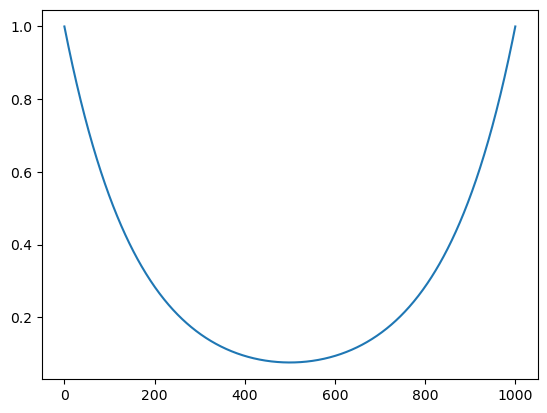

In [27]:
plt.plot(y_solution)

In [9]:
def plotter(x, y, labels, title):
    """
    Plot the winnings against spins
    
    :param data: np array of shape (m,n) where m=episodes, n=spins
    :param label: list of name strings of each episodes
    :param title: name string of graph title
    :return: matplotlib figure of graph
    """

    shp = y.shape
    
    figsize = (11.69, 8.27)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    for i in range(len(labels)):
        ax.plot(x, y[i,:], label=labels[i])
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)
    ax.legend()
    
    return fig

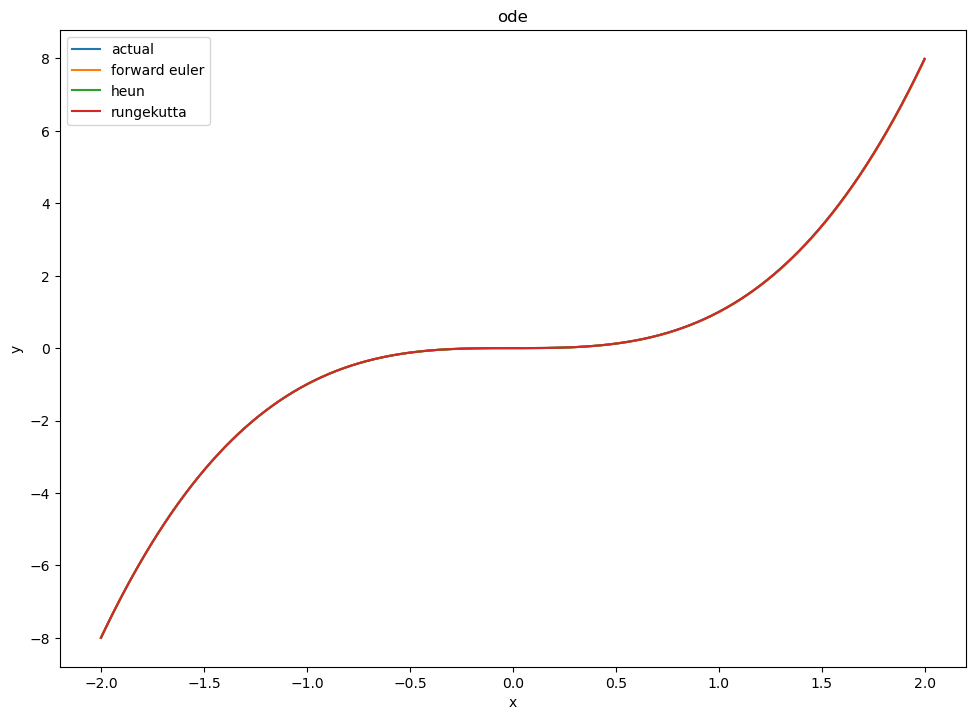

In [28]:
y = np.zeros((6,x.shape[0]))
y[0,:] = y_actual
y[1,:] = y_forwardeuler
y[2,:] = y_heun
y[3,:] = y_rungekutta
y[4,:] = y_velocityverlet
# y[5,:] = y_gaussseidel
# labels = ['actual', 'forward euler', 'heun', 'rungekutta', 'velocity verlet', 'gaussseidel']
labels = ['actual', 'forward euler', 'heun', 'rungekutta']
title = 'ode'
fig = plotter(x, y, labels, title)